<img src="https://github.com/SimonSaban/image/blob/9a8eadf72b7bd40c779bc825c4faf825bafa7b53/soar-logo.png?raw=true" align="left" style="display: inline-block; margin-left: 10px; height: 180px;">
<h1 style="display: inline-block; color: #163E67; margin-left: 80px;">Swan Teleco - Classification Model for Customer Churn</h1>
<h2 align= "left">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By: Aniko, Oaiss, Rachel & Simon</h2>

<h2 align= "left" style="color: #163E67">Data Exploration & Cleaning</h2>

### Imports

In [582]:
# Big 4
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pda

# performance
from sklearn import metrics
from time import time

# modeling libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

# ensamble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Scaling 
from sklearn.preprocessing import RobustScaler


### Exploring

In [546]:
df = pd.read_excel('1 - Project Data.xlsx')

In [547]:
df.shape

(7043, 31)

In [548]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [549]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000


In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

* It appears that most of the coulmns are of object data type so some converting will have to take place in order to run on sklLearn
* Data seems to be complete for most coulmns, but we need to check nulls in Churn Reason column
* Total Charges column for whichever reason is showing as an object despite containing numerical values

In [551]:
df.groupby('Churn Label')[['Churn Reason','CustomerID']].count() 

,Churn Reason,CustomerID
Churn Label,,
No,0,5174
Yes,1869,1869


Nulls in Churn Reason column align with all customers who have not churned, so it makes perfect sense to have them

### Cleaning

In [532]:
# This was commented out as it returned an erro initially

#df['Total Charges'] = df['Total Charges'].astype(float)

Trying to run the above code initially returned - ValueError: could not convert string to float: ' '

This means we have some cells with a space - thanks Alex :)

In [534]:
# find cells with space
df[['Total Charges']][df['Total Charges'] == " "]

,Total Charges
2234,
2438,
2568,
2667,
2856,
4331,
4687,
5104,
5719,
6772,


In [539]:
# use regex to replace the white space with null
df['Total Charges'].replace(r'^\s*$', np.nan, regex=True, inplace = True)

# convert Total Charges Column to float data type
df['Total Charges'] = df['Total Charges'].astype(float)

# check if it worked
df['Total Charges'].dtype

dtype('float64')

In [540]:
# Replace nulls with median value of total charges
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())

In [351]:
# just to be sure...
df['Total Charges'].isnull().sum()

0

Since the customer is requesting to identify specific customers as potential churners we need to somehow keep the customer id in our model

To do so we could set them as the index provided they're all unique

In [562]:
# check all customer id's are unique
len(df['CustomerID'].unique())

7043

In [563]:
df = df.set_index('CustomerID')

In [564]:
df.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


<h2 align= "left" style="color: #163E67">Feature Engineering</h2>

### Feature Selection

Going through the columns in our data set we immediately identified some columns we could drop straight away:
* Count (of ID's maybe? 1 for all rows)
* Country (USA only)
* State (California Only)
* City (we have lat and long should we discover something to do with locality)
* Zip Code (as above)
* Lat Long (we have them in separate columns)
* Churn Label (synonymous with Churn Value which will be our target)
* Churn reason (if the model is meant to identify churners it would be pointless to indicate the ones who churned) 

This still leaves us with quite a few columns for the model. Our approach was to start with many and gradually strip them down based on results

In [475]:
# our first model trained with all columns initially
# through experimentation and importance results we gradually removed what we thought of as noise  
# this selection idicates the final model


feature_cols = [#'Latitude', 
                #'Longitude', 
                #'Gender', 
                #'Senior Citizen', 
                #'Partner', 
                'Dependents', 
                'Tenure Months', 
                #'Phone Service', 
                #'Multiple Lines', 
                'Internet Service', 
                'Online Security', 
                'Online Backup', 
                'Device Protection', 
                'Tech Support', 
                #'Streaming TV', 
                #'Streaming Movies', 
                'Contract', 
                #'Paperless Billing', 
                #'Payment Method', 
                'Monthly Charges', 
                #'Total Charges',
                ]



### Train-Test-Split

In [ ]:
# for random forest
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], 
                                                    df['Churn Value'], 
                                                    test_size = 0.3, 
                                                    random_state = 42)


In [456]:
# This is currently showing the final version of X_train
X_train.head()

,Dependents,Tenure Months,Online Security,Online Backup,Contract,Monthly Charges
CustomerID,,,,,,
9776-CLUJA,No,51,Yes,No,Month-to-month,77.50
3285-UCQVC,No,37,No,No,Month-to-month,28.60
2371-JUNGC,No,11,No internet service,No internet service,Month-to-month,20.25
1821-BUCWY,No,30,Yes,No,Two year,55.65
9337-SRRNI,Yes,66,No internet service,No internet service,Two year,25.30


In [601]:
# for logistic regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(df[feature_cols], 
                                                    df['Churn Value'], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [602]:
X_train_lr.head()

,Dependents,Tenure Months,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Contract,Monthly Charges
CustomerID,,,,,,,,,
9776-CLUJA,No,51,Fiber optic,Yes,No,No,No,Month-to-month,77.50
3285-UCQVC,No,37,DSL,No,No,No,Yes,Month-to-month,28.60
2371-JUNGC,No,11,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,20.25
1821-BUCWY,No,30,DSL,Yes,No,Yes,No,Two year,55.65
9337-SRRNI,Yes,66,No,No internet service,No internet service,No internet service,No internet service,Two year,25.30


### Mapping

Columns with string values would need to be mapped for a random forest or OHE for logistic regression
With regards to mapping we identified 3 types:
* columns with either Yes or No
* columns with Yes/ No/ No Internet Service
* columns with unique values

In [476]:
# mapping list for columns with unique values
# as explained before we gradually dropped columns, and they had to come off here too
mapping_list = [
        #{'col': 'Gender', 
         #'map' :{'Female':0, 'Male':1} 
        #},
        {'col': 'Internet Service',
         'map': { 'No':0, 'Fiber optic':1, 'DSL':2}
        },
        #{'col': 'Multiple Lines',
         #'map' : {'No': 0, 'Yes':1, 'No phone service': 2}
        #},
        {'col': 'Contract',
         'map': { 'Month-to-month': 0, 'One year': 1, 'Two year': 2}
        },
        #{'col': 'Payment Method',
         #'map': { 'Bank transfer (automatic)' : 0, 
         #                   'Credit card (automatic)' : 1,
         #                   'Electronic check': 2, 
         #                   'Mailed check': 3
         #                  }
       # }
    ]

# helper function for mapping of columns with Yes/ No
def yes_no_map(df, column_list):
    for col in column_list:
        df[col] = df[col].map({'No':0, 'Yes':1})

# helper function for mapping of columns with Yes/ No/ No Internet Service 
def yes_no_plus_map(df, column_list):
    for col in column_list:
        df[col] = df[col].map({'No':0, 'Yes':1, 'No internet service': 2})

# helper function for mapping of coulmns with unique values        
def unique_map(df, mapping_list):
    for item in mapping_list:
        df[item['col']] = df[item['col']].map(item['map'])

    




For logistic regression columns with 2 values (like Yes/ No) could still be mapped, but for columns with more values we will have to OHE

In [573]:
# helper function for repetitive one hot encoding Which will get used for log-reg
def OHE(df, column_list):
    for col in column_list:
        df = pd.get_dummies(data = df, columns = [col], prefix= col, drop_first=True, dtype = int)
    return df


# Feature engineering function for logistic regression
def feature_engineering_log_reg(df):
    #df['Gender'] = df.Gender.map({'Female':0, 'Male':1})
    yes_no_map(df, ['Dependents'
                    #'Senior Citizen', 
                    #'Partner',
                    #'Phone Service', 
                    #'Paperless Billing'
                   ])
    df = OHE(df, ['Internet Service', 
                  'Online Security', 
                  'Online Backup', 
                  'Device Protection',
                  'Tech Support', 
                  'Contract', 
                  #'Streaming TV', 
                  #'Streaming Movies'
                 ])
    return df

In [ ]:
# Feature engineering function for random forests
def feature_engineering(df):
    yes_no_map(df, [#'Senior Citizen', 
                    #'Partner', 
                    'Dependents', 
                    #'Phone Service', 
                    #'Paperless Billing'
                   ])
    
    yes_no_plus_map(df, ['Online Security', 
                         'Online Backup', 
                         'Device Protection', 
                         'Tech Support', 
                         #'Streaming TV', 
                         #'Streaming Movies'
                        ])
    
    unique_map(df, mapping_list)
    return df

In [477]:
# one set for random forest
X_train_fe = feature_engineering(X_train)

In [478]:
X_train_fe.head()

,Dependents,Tenure Months,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Contract,Monthly Charges
CustomerID,,,,,,,,,
9776-CLUJA,0,51,1,1,0,0,0,0,77.50
3285-UCQVC,0,37,2,0,0,0,1,0,28.60
2371-JUNGC,0,11,0,2,2,2,2,0,20.25
1821-BUCWY,0,30,2,1,0,1,0,2,55.65
9337-SRRNI,1,66,0,2,2,2,2,2,25.30


In [578]:
# another set for logistic regression
X_train_fe_log_reg = feature_engineering_log_reg(X_train_lr)

In [579]:
X_train_fe_log_reg.head()

,Dependents,Tenure Months,Monthly Charges,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Contract_One year,Contract_Two year
CustomerID,,,,,,,,,,,,,,,
9776-CLUJA,0,51,77.50,1,0,0,1,0,0,0,0,0,0,0,0
3285-UCQVC,0,37,28.60,0,0,0,0,0,0,0,0,0,1,0,0
2371-JUNGC,0,11,20.25,0,1,1,0,1,0,1,0,1,0,0,0
1821-BUCWY,0,30,55.65,0,0,0,1,0,0,0,1,0,0,0,1
9337-SRRNI,1,66,25.30,0,1,1,0,1,0,1,0,1,0,0,1


We thought this might be helpful and useful with providing signals as to which columns we should drop

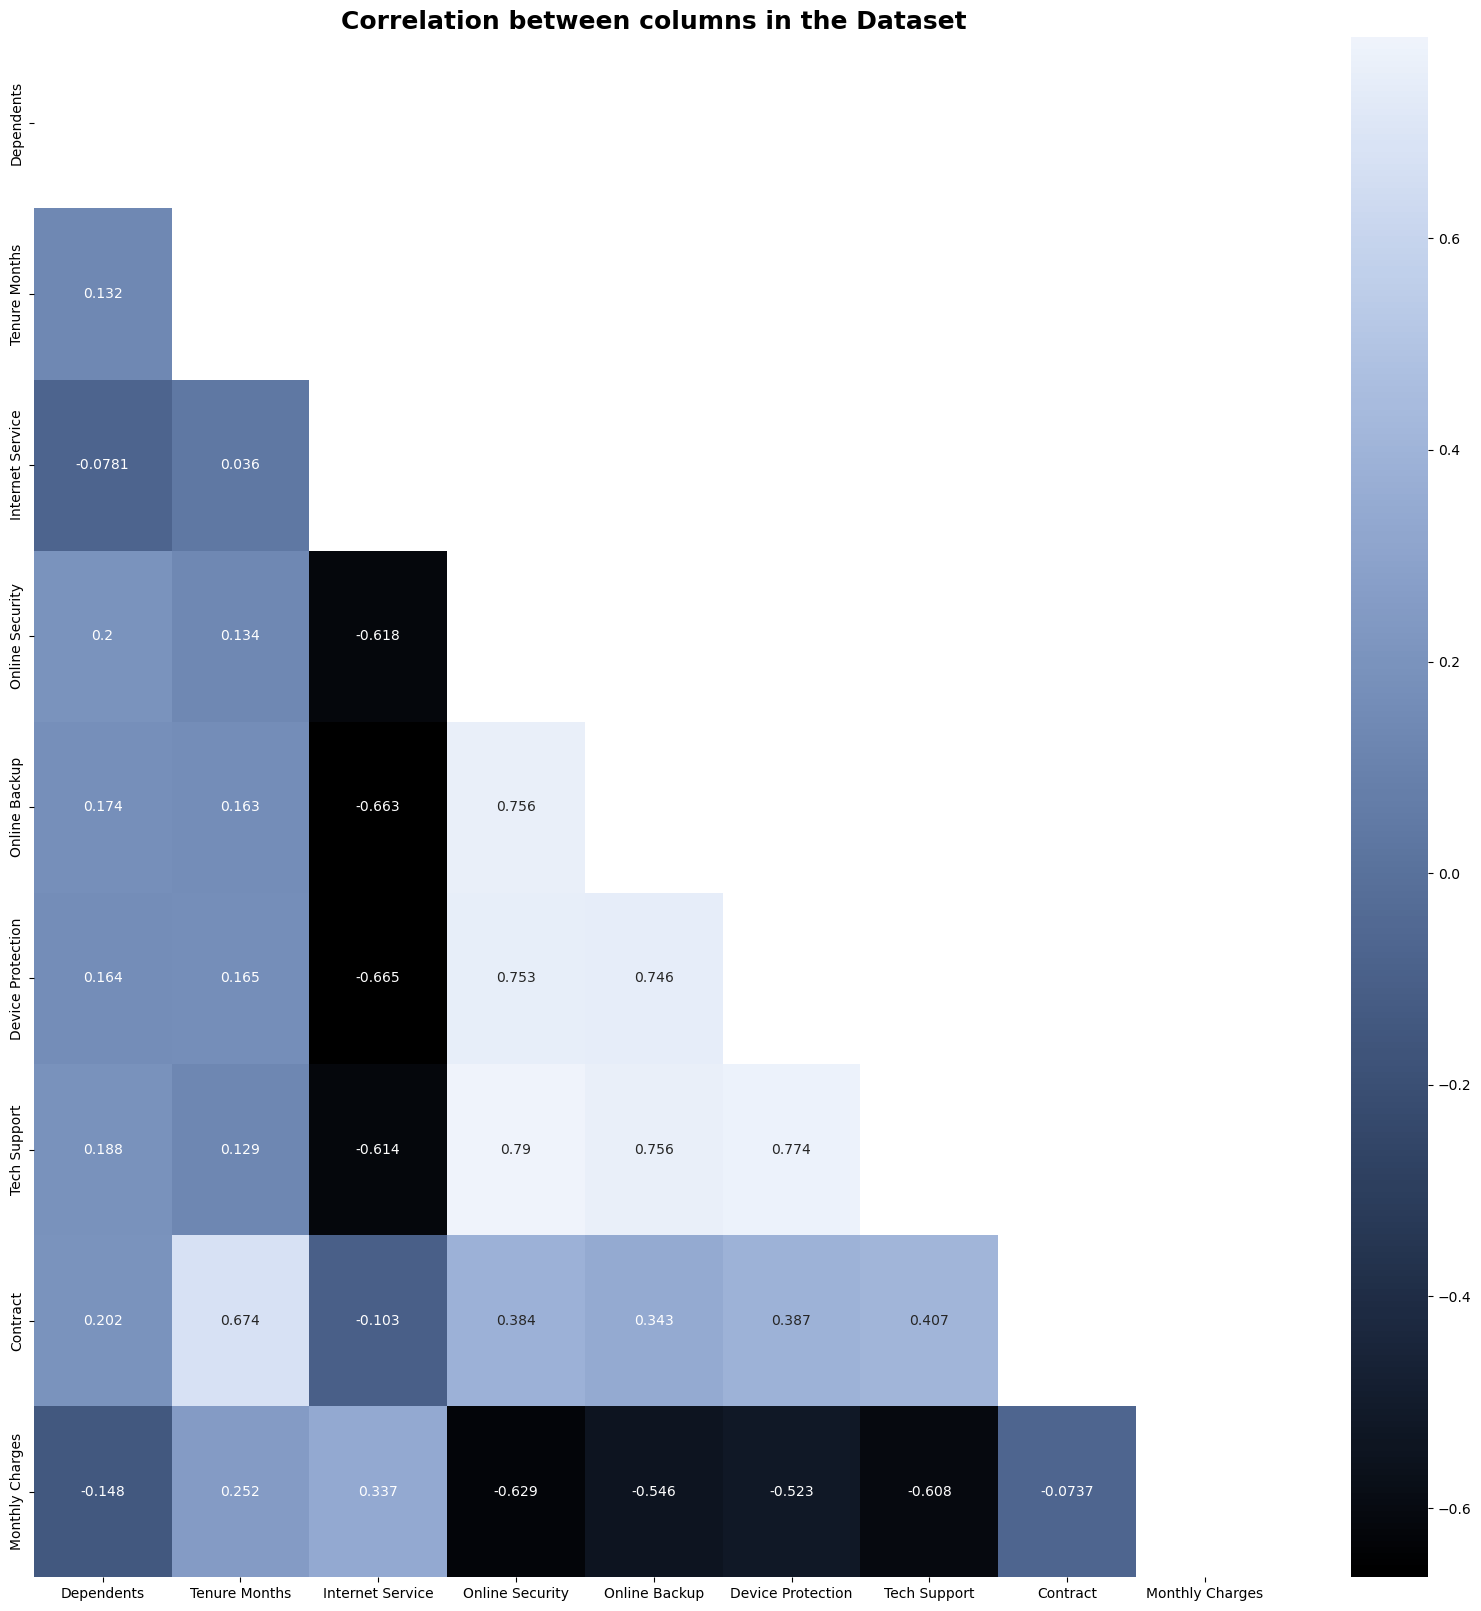

In [566]:
## Making the plot big enough to see all the values clearly
plt.figure(figsize = (20, 20))

## Plotting a heat map of the correlations between columns
sns.heatmap(X_train_fe.corr(numeric_only = True), 
            annot = True,
            fmt = '.3',
            cmap = sns.cubehelix_palette(start=-.2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True),
            mask = np.triu(X_train_fe.corr(numeric_only = True))
            ).set_title("Correlation between columns in the Dataset",weight='bold'
            ).set_fontsize('18')
            

plt.show()

<h2 align= "left" style="color: #163E67">Logistic Regression Model</h2>

### Scaling for logistic regression

In [603]:
rob = RobustScaler()

In [604]:
rob.fit(X_train_fe_log_reg)

RobustScaler()

In [605]:
X_train_scaled = pd.DataFrame(rob.transform(X_train_fe_log_reg))

In [606]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.468085,0.133213,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.170213,-0.747075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,-0.382979,-0.897390,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.021277,-0.260126,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.787234,-0.806481,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### Modelling (logistic regression)

In [607]:
logreg = LogisticRegression(max_iter = 300, random_state = 10)

In [608]:
logreg.fit(X_train_scaled, y_train_lr)

LogisticRegression(max_iter=300, random_state=10)

In [609]:
# probability predictions
logreg.predict_proba(X_train_scaled)

array([[0.74766302, 0.25233698],
       [0.8535185 , 0.1464815 ],
       [0.8113753 , 0.1886247 ],
       ...,
       [0.98977813, 0.01022187],
       [0.98709772, 0.01290228],
       [0.58695594, 0.41304406]])

In [610]:
# probabilities added to train set
X_train_scaled[["prob_stay", "prob_churn"]] = logreg.predict_proba(X_train_scaled)

In [611]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,prob_stay,prob_churn
0,0.0,0.468085,0.133213,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.747663,0.252337
1,0.0,0.170213,-0.747075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.853519,0.146481
2,0.0,-0.382979,-0.897390,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.811375,0.188625
3,0.0,0.021277,-0.260126,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.933714,0.066286
4,1.0,0.787234,-0.806481,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.997260,0.002740


In [612]:
# resetting index to get customer ID's column back 
X_train_scaled.index = X_train_fe.index

In [613]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,prob_stay,prob_churn
CustomerID,,,,,,,,,,,,,,,,,
9776-CLUJA,0.0,0.468085,0.133213,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.747663,0.252337
3285-UCQVC,0.0,0.170213,-0.747075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.853519,0.146481
2371-JUNGC,0.0,-0.382979,-0.897390,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.811375,0.188625
1821-BUCWY,0.0,0.021277,-0.260126,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.933714,0.066286
9337-SRRNI,1.0,0.787234,-0.806481,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.997260,0.002740


In [652]:
# setting a threshold at 0.4
X_train_scaled["y_pred"] = np.where(X_train_scaled["prob_churn"] > 0.4, 1, 0)

In [615]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,prob_stay,prob_churn,y_pred
CustomerID,,,,,,,,,,,,,,,,,,
9776-CLUJA,0.0,0.468085,0.133213,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.747663,0.252337,0
3285-UCQVC,0.0,0.170213,-0.747075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.853519,0.146481,0
2371-JUNGC,0.0,-0.382979,-0.897390,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.811375,0.188625,0
1821-BUCWY,0.0,0.021277,-0.260126,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.933714,0.066286,0
9337-SRRNI,1.0,0.787234,-0.806481,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.997260,0.002740,0


In [616]:
# now the same goes for test
# we start by passing it through FE function
X_test_fe_lr = feature_engineering_log_reg(X_test_lr)

In [617]:
# and scale
X_test_scaled = pd.DataFrame(rob.transform(X_test_fe_lr))

In [618]:
# probability predictions
logreg.predict_proba(X_test_scaled)

array([[0.36018185, 0.63981815],
       [0.58576594, 0.41423406],
       [0.76701441, 0.23298559],
       ...,
       [0.99614002, 0.00385998],
       [0.98463812, 0.01536188],
       [0.97248703, 0.02751297]])

In [619]:
# add probabilities to test set
X_test_scaled[["prob_stay", "prob_churn"]] = logreg.predict_proba(X_test_scaled)

In [620]:
# as before resetting index 
X_test_scaled.index = X_test_fe_lr.index

In [621]:
X_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,prob_stay,prob_churn
CustomerID,,,,,,,,,,,,,,,,,
2189-WWOEW,0.0,-0.297872,0.284428,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.360182,0.639818
2446-ZKVAF,0.0,-0.234043,-0.239424,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.585766,0.414234
4986-MXSFP,0.0,-0.574468,-0.901890,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.767014,0.232986
5868-YWPDW,0.0,-0.489362,0.253825,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306965,0.693035
9412-GHEEC,0.0,0.234043,0.624662,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.531655,0.468345


In [622]:
# setting threshold at 0.4
X_test_scaled["y_pred"] = np.where(X_test_scaled["prob_churn"] > 0.4, 1, 0)

### Evaluate the model

In [ ]:
# helper function to get all metrics
def apr(y_pred, y_real):
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)
    
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1

In [685]:
apr(X_train_scaled["y_pred"], y_train_lr)

Accuracy:0.7924949290060852
Precision:0.5881147540983607
Recall:0.6721311475409836
F1:0.6273224043715846


(0.7924949290060852,
 0.5881147540983607,
 0.6721311475409836,
 0.6273224043715846)

In [638]:
apr(X_test_scaled["y_pred"], y_test_lr)

Accuracy:0.7870326549929011
Precision:0.6002906976744186
Recall:0.7023809523809523
F1:0.647335423197492


(0.7870326549929011, 0.6002906976744186, 0.7023809523809523, 0.647335423197492)

Reasonable results showing a fairly robust model

In [631]:
# confusion matrix for train
print(metrics.confusion_matrix(y_train_lr, X_train_scaled["y_pred"]))

[[3046  603]
 [ 420  861]]


In [632]:
# confusion matrix for test
print(metrics.confusion_matrix(y_test_lr, X_test_scaled["y_pred"]))

[[1250  275]
 [ 175  413]]


Text(0.5, 1.0, 'Confusion Matrix for Test Set')

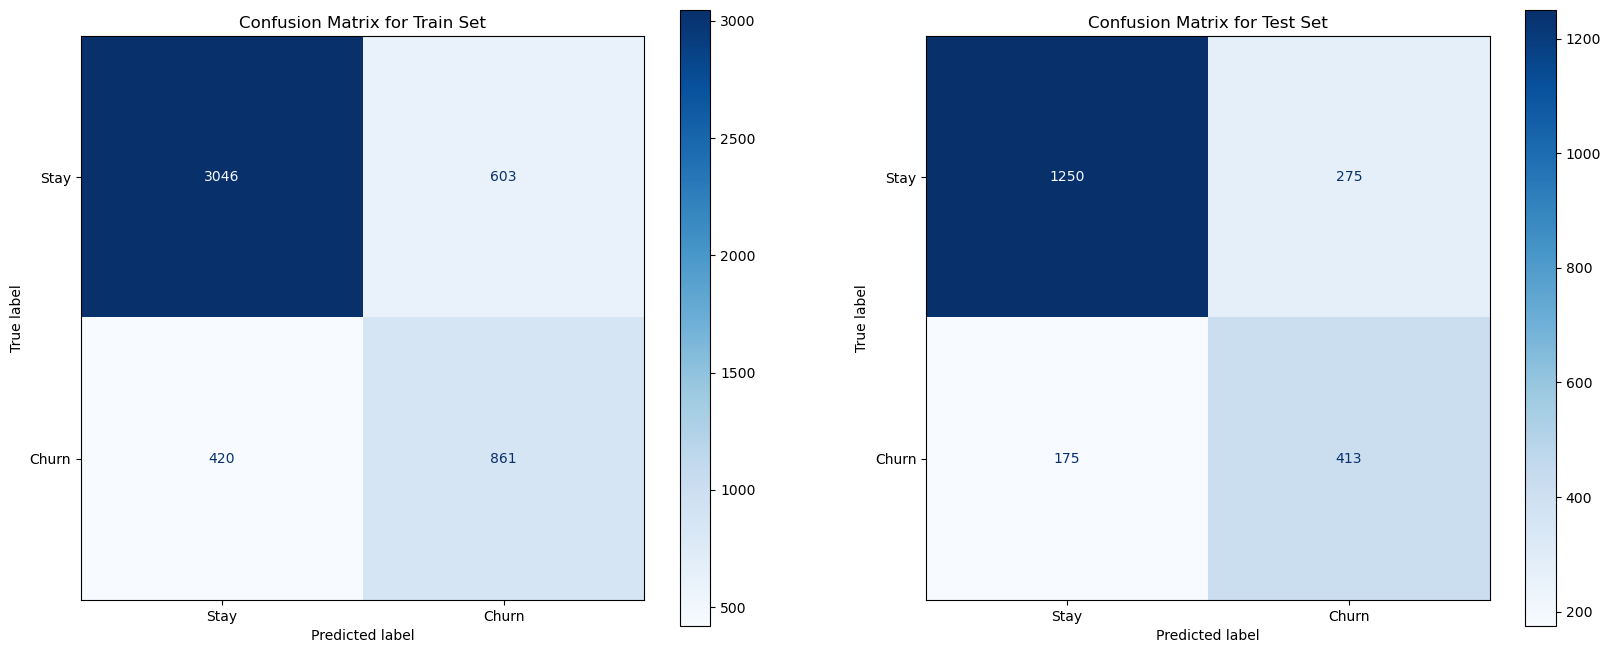

In [686]:
# plotting confusion matrix for train and test

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

cmd_train = metrics.ConfusionMatrixDisplay.from_predictions(y_train_lr, X_train_scaled["y_pred"], display_labels=['Stay', 'Churn'], cmap = 'Blues', ax = ax1)
cmd_train.ax_.set_title("Confusion Matrix for Train Set")

cmd_test = metrics.ConfusionMatrixDisplay.from_predictions(y_test_lr, X_test_scaled["y_pred"], display_labels=['Stay', 'Churn'], cmap = 'Blues', ax = ax2)
cmd_test.ax_.set_title("Confusion Matrix for Test Set")


We wanted to experiment with other models  

<h2 align= "left" style="color: #163E67">Random Forest Model</h2>

### Creation Fitting & Fine-Tuning  

In [479]:
# create object
rf = RandomForestClassifier(n_estimators=50)

In [480]:
# get score with 5 folds
rf_score = cross_val_score(rf, X_train_fe, y_train, cv=5)

In [481]:
print(f'Random scored {rf_score}')

Random scored [0.79208925 0.7484787  0.77991886 0.76977688 0.77383367]


In [482]:
# hypertuning the random forest itself

# step 1: select the params for our random forest
rf_params = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [None, 1, 2, 3, 4, 5],  
    #'max_features': [5, 6, 7, 8], once columns have been reduced significantly it felt like there was no need for this  
    
}

# create a grid search object
gs = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose = 1, scoring = 'accuracy') 

# fit the grid search on the training set
gs.fit(X_train_fe, y_train)

# get the best accuracy score
print(gs.best_score_)

# get best parameters
gs.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0.7983772819472617


{'max_depth': 5, 'n_estimators': 100}

In [484]:
# save best model as a random forest model
best_rf = gs.best_estimator_

# use the best model to predict on X_train
y_pred = best_rf.predict(X_train_fe)

# explainability of Random Forest/Decision Trees
importance = list(zip(X_train_fe.columns, best_rf.feature_importances_))

In [485]:
# sort importances of columns in model
sorted(importance, key=lambda x: x[1], reverse=True)

[('Contract', 0.32167828007294424),
 ('Tenure Months', 0.18950674882117013),
 ('Tech Support', 0.10699331249549061),
 ('Online Security', 0.10200149206477166),
 ('Monthly Charges', 0.09263634752899313),
 ('Dependents', 0.08462774932847011),
 ('Internet Service', 0.04951941748568979),
 ('Online Backup', 0.03997436703370057),
 ('Device Protection', 0.013062285168769843)]

### Evaluating the Model

In [483]:
gs.score(X_train_fe, y_train)

0.8129817444219067

In [486]:
apr(y_pred, y_train)

Accuracy:0.8129817444219067
Precision:0.6867845993756504
Recall:0.5152224824355972
F1:0.5887600356824264


(0.8129817444219067,
 0.6867845993756504,
 0.5152224824355972,
 0.5887600356824264)

In [490]:
X_test_fe = feature_engineering(X_test)

In [491]:
y_test_pred = best_rf.predict(X_test_fe) 

In [492]:
apr(y_test_pred, y_test)

Accuracy:0.8017037387600567
Precision:0.6794055201698513
Recall:0.54421768707483
F1:0.6043437204910294


(0.8017037387600567, 0.6794055201698513, 0.54421768707483, 0.6043437204910294)

We seem to have a model that isn't overfit and even performed a little better on the test dataset with recall and F1 metrics

### Further Tuning with Threshold

In [488]:
# threshold parameter that was tested with various values 
threshold = 0.4

train_results = X_train.copy()

# adding target probability and prediction based on the threshold to a copy of our training set 
train_results['y_real'] = y_train
train_results['y_prob'] = best_rf.predict_proba(X_train_fe)[:,1] 
train_results['y_pred'] = (best_rf.predict_proba(X_train_fe)[:,1] >= threshold).astype(int)

# a glance to see it works
train_results[['y_pred', 'y_prob']][train_results['y_pred'] >= threshold]

,y_pred,y_prob
CustomerID,,
8650-RHRKE,1,0.498135
3565-UNOCC,1,0.525475
9057-SIHCH,1,0.689051
9506-UXUSK,1,0.564280
1024-GUALD,1,0.575666
...,...,...
7851-FLGGQ,1,0.445778
4636-QRJKY,1,0.557708
6896-SRVYQ,1,0.460370


In [489]:
# checking metrics once threshold is applied
apr(train_results['y_pred'], train_results['y_real'])

Accuracy:0.8040567951318458
Precision:0.6086956521739131
Recall:0.6885245901639344
F1:0.6461538461538463


(0.8040567951318458,
 0.6086956521739131,
 0.6885245901639344,
 0.6461538461538463)

* Taking into consideration the imbalance in our data between customers who have churned vs. those who stayed, it is likely that the model is going to be a little biased towards predicting that customers are more likely to stay so reducing the threshold seems like a good way to address that.
* It looks like reducing the threshold has paid off. The loss in accuracy is negligble. Precision has dropped a lot, however recall and F1 metrics have increased significantly. Since we thought that false negative predictions are very relevant for this task the gain in F1 score was worth it 

In [495]:
# now applying the same threshold on test
test_results = X_test_fe.copy()

test_results['y_real'] = y_test
test_results['y_prob'] = best_rf.predict_proba(X_test_fe)[:,1] 
test_results['y_pred'] = (best_rf.predict_proba(X_test_fe)[:,1]>= threshold).astype(int)
                                                                        
test_results.head()

,Dependents,Tenure Months,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Contract,Monthly Charges,y_real,y_prob,y_pred
CustomerID,,,,,,,,,,,,
2189-WWOEW,0,15,1,0,1,0,0,0,85.9,1,0.576822,1
2446-ZKVAF,0,18,2,0,1,0,0,0,56.8,0,0.292941,0
4986-MXSFP,0,2,0,2,2,2,2,0,20.0,0,0.201972,0
5868-YWPDW,0,6,1,0,1,0,0,0,84.2,1,0.638032,1
9412-GHEEC,0,40,1,0,0,1,1,0,104.8,1,0.414972,1


In [496]:
# checking metrics once threshold is applied
apr(test_results['y_pred'], test_results['y_real'])

Accuracy:0.8021769995267393
Precision:0.6253687315634219
Recall:0.7210884353741497
F1:0.6698262243285941


(0.8021769995267393,
 0.6253687315634219,
 0.7210884353741497,
 0.6698262243285941)

* Even better recall & F1 results on test compared to train with a reduced threshold
* This will be the one that we'll use to produce our predictions to the customer

<h2 align= "left" style="color: #163E67">Output Files for Customer</h2>

In [571]:
# combine train and test data frames with probablities and predictions
final_df = pd.concat([train_results, test_results])

In [498]:
# Check that it worked
final_df.head()

,Dependents,Tenure Months,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Contract,Monthly Charges,y_real,y_prob,y_pred
CustomerID,,,,,,,,,,,,
9776-CLUJA,0,51,1,1,0,0,0,0,77.50,1,0.364410,0
3285-UCQVC,0,37,2,0,0,0,1,0,28.60,1,0.241330,0
2371-JUNGC,0,11,0,2,2,2,2,0,20.25,0,0.174962,0
1821-BUCWY,0,30,2,1,0,1,0,2,55.65,0,0.057149,0
9337-SRRNI,1,66,0,2,2,2,2,2,25.30,0,0.004887,0


In [499]:
# Check the dimensions of the dataframe
final_df.shape

(7043, 12)

In [501]:
#Reset the index so customer ID turns from index to a column in the dataframe
final_df = final_df.reset_index()

In [502]:
# Select only the customer ID and the probability of churning columns
final_df = final_df[['CustomerID', 'y_prob']]

In [504]:
# Sort by probability, from highest to lowest
final_df = final_df.sort_values(by = 'y_prob', ascending = False)

In [505]:
final_df.head()

,CustomerID,y_prob
1097,6857-VWJDT,0.745056
3108,5178-LMXOP,0.743574
566,0295-PPHDO,0.743574
1852,3988-RQIXO,0.742034
2237,6521-YYTYI,0.742034


In [506]:
# Save it into a .csv file
final_df.to_csv('churn_rates.csv', index = False)

In [507]:
# Select the 500 customers with the highest probability of churning
top_500 = final_df.head(500)

In [508]:
# Check that the result has 500 rows and 2 columns
top_500.shape

(500, 2)

In [509]:
# Check the last 5 entries
top_500.tail()

,CustomerID,y_prob
4523,6229-LSCKB,0.645387
6228,6437-UKHMV,0.645387
3234,0947-IDHRQ,0.645387
3403,2026-TGDHM,0.645387
5728,2446-BEGGB,0.645006


In [510]:
# Save it into a .csv file
top_500.to_csv('top_500.csv', index = False)